In [1]:
from auditory_cortex.computational_models.baseline import STRF
from auditory_cortex.dataloader import DataLoader
import numpy as np
import pandas as pd
from sklearn.linear_model import RidgeCV, ElasticNetCV

INFO:fairseq.tasks.text_to_speech:Please install tensorboardX: pip install tensorboardX
DEBUG:matplotlib.pyplot:Loaded backend agg version unknown.


### Baseline distribution...

In [1]:
from auditory_cortex.analyses.regression_correlations import Correlations

In [70]:
model_name = 'wave2letter_modified'
identifier = 'sampling_rate_opt_neural_delay'

corr_obj = Correlations(model_name+'_'+identifier)

Reading existing dataframe.


In [74]:
area = 'belt'
bin_width = 20
normalized = True
baseline = corr_obj.get_baseline_corr_for_area(
    neural_area=area, bin_width=bin_width, threshold=0.061, normalized=normalized)

In [75]:
baseline.shape

(19,)

In [63]:
corr_obj = Correlations(model_name='STRF')

Reading existing dataframe.


In [53]:
corr_obj.data.shape

(2442, 10)

In [51]:
corr_obj.data

,session,channel,bin_width,delay,strf_corr,normalizer,strf_corr_normalized,test_cc_raw,N_sents,normalized_test_cc
0,200206.0,0.0,20.0,0.0,0.118883,0.183040,0.277706,0.118883,500.0,0.277873
64,180420.0,0.0,20.0,0.0,-0.009049,-0.006932,NaN,-0.009049,500.0,NaN
80,190726.0,0.0,20.0,0.0,0.005723,0.005425,0.088408,0.005723,500.0,0.077697
140,180613.0,0.0,20.0,0.0,0.050992,-0.004796,NaN,0.050992,500.0,NaN
156,191206.0,0.0,20.0,0.0,0.010501,NaN,inf,0.010501,500.0,NaN
217,200318.0,0.0,20.0,0.0,0.051317,0.006665,0.683060,0.051317,500.0,0.628570
262,180720.0,0.0,20.0,0.0,0.041503,0.002848,0.777271,0.041503,500.0,0.777738
278,191219.0,0.0,20.0,0.0,0.005726,-0.010842,NaN,0.005726,500.0,NaN
340,191125.0,0.0,20.0,0.0,-0.002208,-0.004852,NaN,-0.002208,500.0,NaN
400,180731.0,0.0,20.0,0.0,0.121637,0.086090,0.422539,0.121637,500.0,0.414563


In [24]:
sessions = corr_obj.get_significant_sessions(threshold=0.061)
num_channels = 0
for session in sessions:
    # print(f"Session: {session}: num_channels: {len(channels)}")
    channels = corr_obj.get_good_channels(session, threshold=0.061)
    print(f"Session: {session}: num_channels: {len(channels)}")
    num_channels += len(channels)
num_channels


Session: 200206.0: num_channels: 63
Session: 191206.0: num_channels: 10
Session: 180720.0: num_channels: 5
Session: 191125.0: num_channels: 11
Session: 180731.0: num_channels: 14
Session: 180814.0: num_channels: 13
Session: 200213.0: num_channels: 14
Session: 200207.0: num_channels: 9
Session: 191210.0: num_channels: 3
Session: 191115.0: num_channels: 4
Session: 191113.0: num_channels: 27
Session: 180717.0: num_channels: 1
Session: 180627.0: num_channels: 1
Session: 180719.0: num_channels: 2
Session: 180807.0: num_channels: 13
Session: 200205.0: num_channels: 5
Session: 180808.0: num_channels: 3
Session: 200313.0: num_channels: 12
Session: 191121.0: num_channels: 7


217

In [64]:
session = 191113
num_channels = 0
ids_remove_list = []
for session in sessions:
    select = corr_obj.data[corr_obj.data['session'] == session]
    select = select[
        # (select['normalizer'] >= 0.061) &\
        (select['bin_width'] == 20) &\
        (select['delay'] == 0)
                    ]

    channels = select['channel'].unique()
    for channel in channels:

        if select[select['channel']==channel].shape[0] > 1:
            id = select[select['channel']==channel].index[1]
            ids_remove_list.append(id)


In [65]:
len(ids_remove_list)

184

In [66]:
corr_obj.data.shape

(2442, 10)

In [67]:
corr_obj.data.drop(ids_remove_list, inplace=True)

In [68]:
corr_obj.data.shape

(2258, 10)

In [69]:
corr_obj.write_back()

Saved at /depot/jgmakin/data/auditory_cortex/results/cross_validated_correlations/STRF_corr_results.csv


In [44]:
channels

array([ 1.,  5.,  8.,  9., 11., 12., 13., 14., 16., 20., 21., 29., 30.,
       32., 34., 35., 36., 37., 38., 39., 41., 50., 51., 53., 55., 57.,
       58.])

In [55]:
ids_remove_list = []
if select[select['channel']==1].shape[0] > 1:
    id = select[select['channel']==1].index[1]
    ids_remove_list.append(id)



2

In [58]:
select[select['channel']==1].index[1]

1319

In [32]:
dist = corr_obj.get_baseline_corr_session(
    sessions=sessions, threshold=0.061
)

In [33]:
dist.shape

(266,)

In [42]:
import pandas as pd
delay = 0
bin_width = 20
threshold = 0.061
num_channels = 0

select_baseline = corr_obj.baseline_corr[
        (corr_obj.baseline_corr['bin_width']==bin_width)&\
        (corr_obj.baseline_corr['delay']==delay)
    ]

if threshold is not None:
    select_baseline = select_baseline[
        (select_baseline['normalizer']>=threshold)
    ]
if sessions is not None:
    # sessions should be list or None...
    session_baselines = []
    for session in sessions:
        session_select = select_baseline[(select_baseline['session']==float(session))]
        session_baselines.append(session_select)
        channels = session_select['channel']
        print(f"Session: {session}: num_channels: {channels.size}")
        num_channels += channels.size 
            
    baseline = pd.concat(session_baselines)    
num_channels

Session: 200206.0: num_channels: 63
Session: 191206.0: num_channels: 10
Session: 180720.0: num_channels: 5
Session: 191125.0: num_channels: 11
Session: 180731.0: num_channels: 14
Session: 180814.0: num_channels: 13
Session: 200213.0: num_channels: 14
Session: 200207.0: num_channels: 9
Session: 191210.0: num_channels: 3
Session: 191115.0: num_channels: 4
Session: 191113.0: num_channels: 54
Session: 180717.0: num_channels: 2
Session: 180627.0: num_channels: 2
Session: 180719.0: num_channels: 4
Session: 180807.0: num_channels: 26
Session: 200205.0: num_channels: 10
Session: 180808.0: num_channels: 3
Session: 200313.0: num_channels: 12
Session: 191121.0: num_channels: 7


266

In [40]:
baseline.shape

(266, 10)

In [27]:
corr_obj.baseline_corr

,session,channel,bin_width,delay,strf_corr,normalizer,strf_corr_normalized,test_cc_raw,N_sents,normalized_test_cc
0,200206.0,0.0,20.0,0.0,0.118883,0.183040,0.277873,0.118883,500.0,0.277873
1,200206.0,1.0,20.0,0.0,0.197218,0.221730,0.418827,0.197218,500.0,0.418827
2,200206.0,2.0,20.0,0.0,0.154856,0.139056,0.415273,0.154856,500.0,0.415273
3,200206.0,3.0,20.0,0.0,0.331080,0.413185,0.515063,0.331080,500.0,0.515063
4,200206.0,4.0,20.0,0.0,0.087961,0.122413,0.251407,0.087961,500.0,0.251407
...,...,...,...,...,...,...,...,...,...,...
2437,190801.0,59.0,20.0,0.0,0.013906,-0.019971,NaN,0.013906,500.0,NaN
2438,190801.0,60.0,20.0,0.0,0.018908,-0.007210,NaN,0.018908,500.0,NaN
2439,190801.0,61.0,20.0,0.0,0.019551,-0.012213,NaN,0.019551,500.0,NaN
2440,190801.0,62.0,20.0,0.0,0.007693,-0.003333,NaN,0.007693,500.0,NaN


### other..

In [75]:
sess = '200206'
num_alphas = 10
alphas = np.logspace(-2, 5, num_alphas)
estimator = RidgeCV(alphas=alphas, cv=5)

In [76]:
strf = STRF(
    session=sess,
     estimator=estimator)

In [77]:
batch = strf.get_sample(12)

In [78]:
batch[0].shape

(69, 32)

In [6]:
# corr = strf.fit()

  0%|          | 0/64 [00:00<?, ?it/s]

In [ ]:
dataloader = DataLoader()

In [2]:
import torch.nn as nn
import torch

In [5]:
num_freqs = 32
sfreq = 100

spect = torch.randn((1, num_freqs, sfreq))

In [6]:
spect.shape

torch.Size([1, 32, 100])

30

In [66]:
in_channels = 32
tmin = 0.0
tmax = 0.3

past_samples = int(sfreq*tmax)
future_samples = int(sfreq*tmin) # zero for causal models...
kernel_size = past_samples + future_samples
padding = past_samples-1
extra_samples = padding - future_samples

conv = nn.Conv1d(
    in_channels=in_channels, out_channels=1,
    kernel_size=kernel_size, padding=padding, stride=1
)


In [67]:
out = conv(spect)[...,:-extra_samples]
out.shape

torch.Size([1, 1, 100])

In [57]:
extra_samples

-1

torch.Size([1, 1, 129])

In [2]:
dataloader = DataLoader()

In [3]:
sess = '200206'
spikes = dataloader.get_session_spikes(sess)

In [72]:
spikes[12].shape

(69, 64)

DEBUG:matplotlib.pyplot:Loaded backend module://matplotlib_inline.backend_inline version unknown.


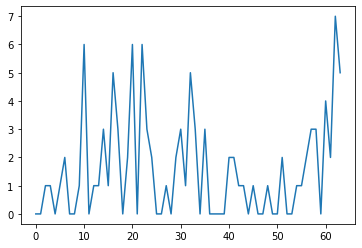

In [73]:
import matplotlib.pylab as plt
%matplotlib inline

plt.plot(spikes[12][32])

DEBUG:matplotlib.pyplot:Loaded backend module://matplotlib_inline.backend_inline version unknown.


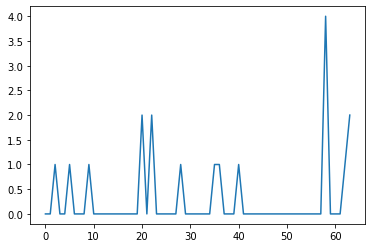

In [5]:
import matplotlib.pylab as plt
%matplotlib inline

plt.plot(spikes[100][32])